Note: you may need to restart the kernel to use updated packages.
Baseline GMV: 133465766.06
Test Scenario GMV: 115759177.49
GMV Change: -17706588.57


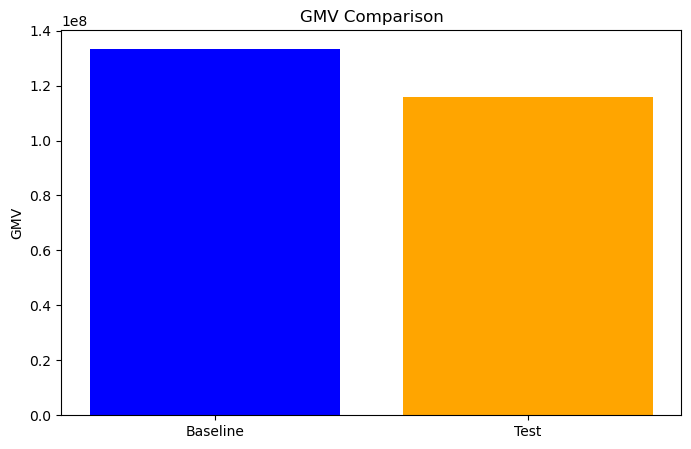

In [2]:
# 02_financial_analysis.ipynb

%pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "../data"

# Load baseline & test scenario results
baseline = pd.read_csv(f"{DATA_DIR}/sales_sim.csv")
test = pd.read_csv(f"{DATA_DIR}/prices_advanced.csv")

# Calculate GMV and Net Profit
baseline['gmv'] = baseline['our_price'] * baseline['units_sold']
# Merge baseline units_sold into test dataframe
test = test.merge(baseline[['sku_id', 'date', 'units_sold']], on=['sku_id', 'date'], how='left')
test['price_used'] = test['our_new_price']
test['gmv'] = test['price_used'] * test['units_sold']

baseline_gmv = baseline['gmv'].sum()
test_gmv = test['gmv'].sum()

print(f"Baseline GMV: {baseline_gmv:.2f}")
print(f"Test Scenario GMV: {test_gmv:.2f}")
print(f"GMV Change: {test_gmv - baseline_gmv:.2f}")

# Plot GMV comparison
plt.figure(figsize=(8,5))
plt.bar(['Baseline','Test'], [baseline_gmv, test_gmv], color=['blue','orange'])
plt.title("GMV Comparison")
plt.ylabel("GMV")
plt.show()
